In [ ]:
import numpy as np
from math import sqrt
from collections import Counter
from matplotlib import style
import matplotlib.pyplot as plt
style.use('fivethirtyeight')

In [ ]:
dataset = {'b': [[1, 2], [2, 3], [2, 2], [3, 1]], 'r' : [[6, 2], [7, 2], [7, 1], [8, 3]]}

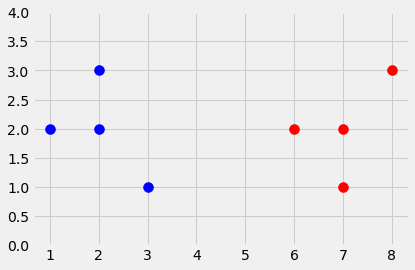

In [ ]:
for i in dataset:
  for j in dataset[i]:
    plt.scatter(j[0], j[1], s = 100, color = i)

plt.ylim(0, 4, 1)
plt.show()

# **backend of determining the class that the prediction belongs to**

In [ ]:
predict = [6, 3]
distances = []
for i in dataset:
  for j in dataset[i]:
    #a better way to calculate the distance between each point and the prediction((y2-y1)^2 + (x2-x1)^2)
    euclidean_distance = np.linalg.norm(np.array(j) - np.array(predict))
    (distances.append([euclidean_distance, i]))
votes = [i[1] for i in sorted(distances)[:3]] #k = 3
print(votes)
# print(sorted(distances))
print(Counter(votes).most_common(1)[0][0])

['r', 'r', 'r']
r


# **K Nearest Neighbor function that returns the class prediction belongs to, given the dataset**

In [ ]:
def k_nearest_neighbors(data, predict, k = 3):
  distances = []
  for i in data:
    for j in data[i]:
      euclidean_distance = np.linalg.norm(np.array(j) - np.array(predict))
      (distances.append([euclidean_distance, i]))
  votes = [i[1] for i in sorted(distances)[:k]]
  vote_result = Counter(votes).most_common(1)[0][0]
  return vote_result



# **Running our KNN on our own dataset**

In [ ]:
dataset = {'b': [[1, 2], [2, 3], [2, 2], [3, 1]], 'r' : [[6, 2], [7, 2], [7, 1], [8, 3]]}
prediction = [6, 3]
predict_grp = k_nearest_neighbors(dataset, predict)

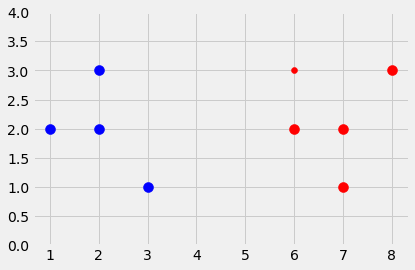

In [ ]:
for i in dataset:
  for j in dataset[i]:
    plt.scatter(j[0], j[1], s = 100, color = i)

plt.ylim(0, 4, 1)
plt.scatter(prediction[0], prediction[1], color = predict_grp)
plt.show()

# **Applying our KNN on cancer detection dataset and compare it against sklearn's KNN**

In [ ]:
import pandas as pd
import random
import io
from google.colab import files
uploaded = files.upload()

Saving breast-cancer-wisconsin.data to breast-cancer-wisconsin.data


In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['breast-cancer-wisconsin.data']))
df.head()
df.columns

Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland)chrom',
       'norm_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [ ]:
df.replace('?', -99999, inplace = True)
# df.drop(['id'], 1, inplace = True)
data = df.astype(float). values.tolist() #
random.shuffle(data) #shuffles the data

train_size = int(0.8*len(data))
train_set = {2: [], 4: []}
test_set = {2: [], 4: []}

#splitting the data into train and test
train_data = data[0:train_size+1]   
test_data = data[train_size:-1]


len(train_data+test_data) #699


for i in train_data:
  train_set[i[-1]].append(i[:-1])

for i in test_data:
  test_set[i[-1]].append(i[:-1])


total = 0
correct_votes = 0
for group in test_set: #group = 2 and 4
  for values in test_set[group]:
    KNN_vote = k_nearest_neighbors(train_set, values, k = 5)
    if KNN_vote == group:
      correct_votes += 1
    total += 1

accuracy = (correct_votes/total)
print(accuracy)



# train_data


0.9640287769784173


## For understanding how the loop works

In [ ]:
dt = {2: [], 4: []}
dt2 = [1, 4, 2], [2, 1, 2], [2, 2, 4], [3, 5, 2]
for i in dt2:
  dt[i[-1]].append(i[:-1])
print(dt)



dt = {2: [], 4: []}
dt2 = [1, 4, 2], [2, 1, 2], [2, 2, 4], [3, 8, 2]
for i in dt2:
  # print(dt[i[-1]])
  print(i[-1])

{2: [[1, 4], [2, 1], [3, 8]], 4: [[2, 2]]}
